# Dimensionality Reduction

## 1. Face Detection Using SVM and PCA

In [1]:
import numpy as np
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 4096)

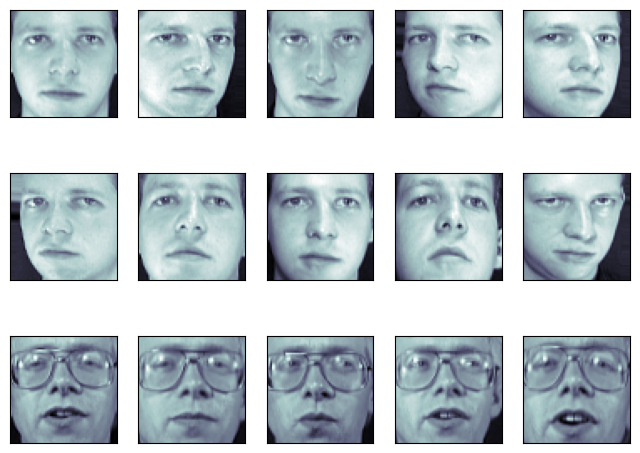

In [7]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [9]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

In [10]:
pca.components_.shape

(150, 4096)

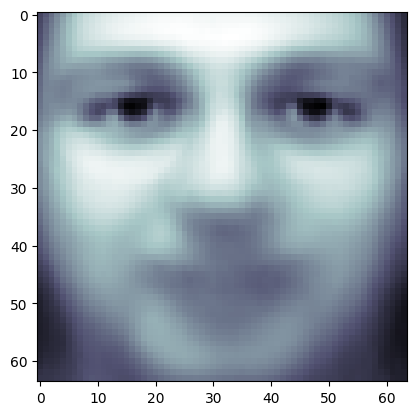

In [11]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap=plt.cm.bone)

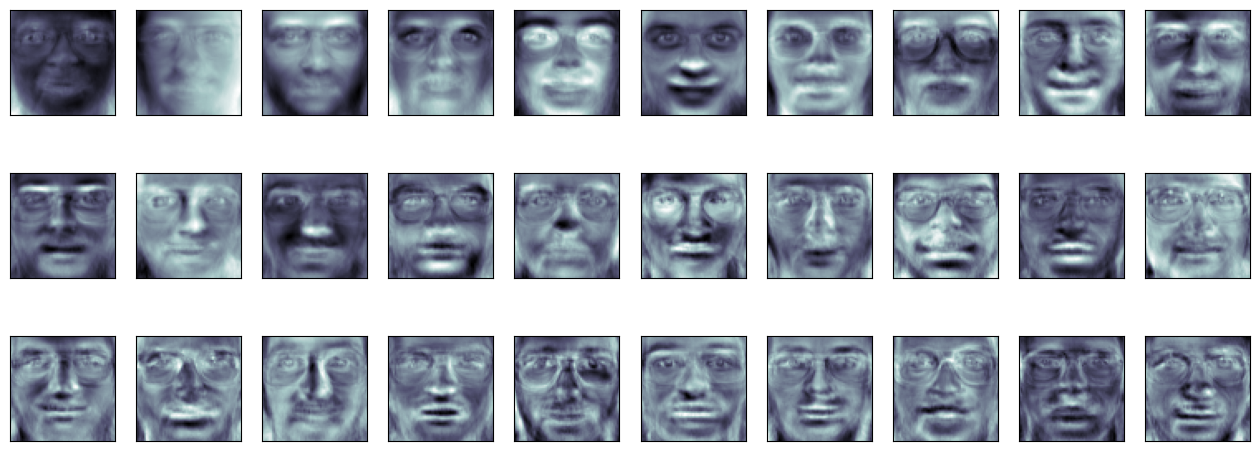

In [12]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)

The components (“eigenfaces”) are ordered by their importance from top-left to bottom-right. We see that the first few components seem to primarily take care of lighting conditions; the remaining components pull out certain identifying features: the nose, eyes, eyebrows, etc.

Text(0, 0.5, 'Explained variance')

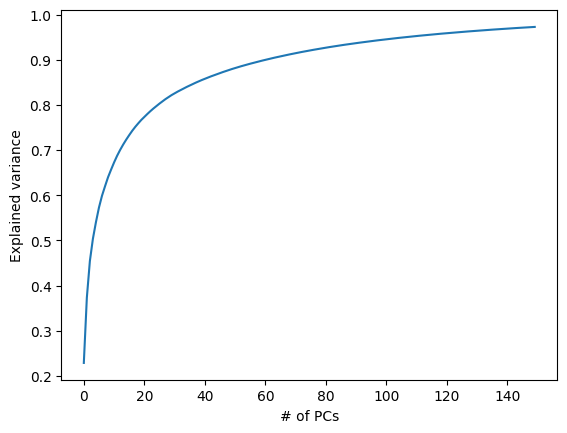

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of PCs")
plt.ylabel("Explained variance")

In [14]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [19]:
print(X_test_pca.shape)

(100, 150)


In [20]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

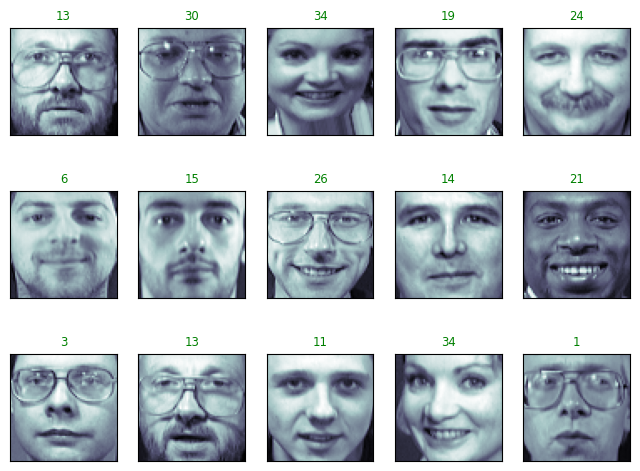

In [32]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('green' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [33]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         4
           2       0.33      0.50      0.40         2
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
          20       0.50    

## Using Pipelines

In [34]:
from sklearn.pipeline import Pipeline
clf_pipeline = Pipeline([
    ('pca', decomposition.PCA(n_components=150, whiten=True)),
    ('svm', svm.LinearSVC(C=1.0, max_iter=2000))
])

clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=150, whiten=True)),
                ('svm', LinearSVC(max_iter=2000))])

In [35]:
y_pred = clf_pipeline.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
print(metrics.accuracy_score(y_pred, y_test))

[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]
0.94


## 2. t-SNE

In [36]:
import pandas as pd
import seaborn as sns

In [37]:
pca.transform(faces.data).shape

(400, 150)

<Axes: xlabel='x', ylabel='y'>

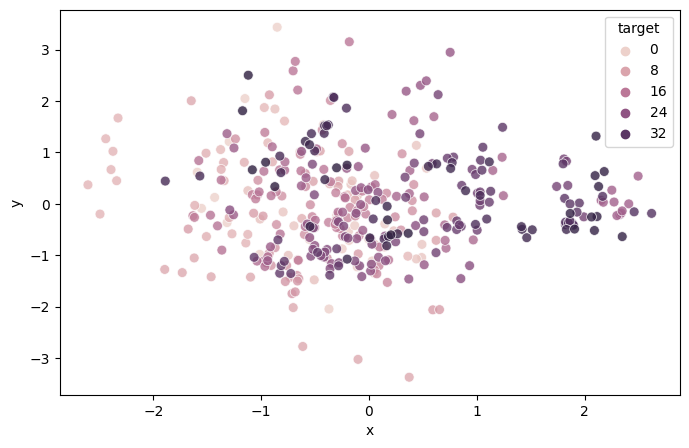

In [38]:
pca_projection = pca.transform(faces.data)

pca_df = pd.DataFrame(
    np.c_[pca_projection[:, 0: 2], faces.target], 
    columns=['x', 'y', 'target']
)

plt.figure(figsize=(8, 5))
sns.scatterplot(pca_df, x="x", y="y", hue="target", s=50, alpha=.8)

In [39]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    n_iter=500,
    n_iter_without_progress=150,
    n_jobs=2,
    random_state=0,
)


tsne_projection = tsne.fit_transform(faces.data)

In [40]:
import pandas as pd
import seaborn as sns

tsne_df = pd.DataFrame(
    np.c_[tsne_projection, faces.target], 
    columns=['x', 'y', 'target']
)


<Axes: xlabel='x', ylabel='y'>

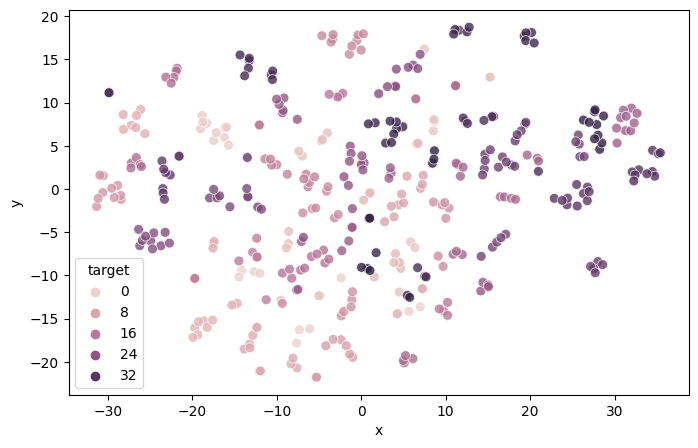

In [41]:
plt.figure(figsize=(8, 5))
sns.scatterplot(tsne_df, x="x", y="y", hue="target", s=50, alpha=.8)

## 💀 Exercise

- Repeat the above for MNIST(digits) data (see below). 
- See the difference between PCA and t-SNE in the visualization.

In [42]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.data.shape)

(1797, 64)


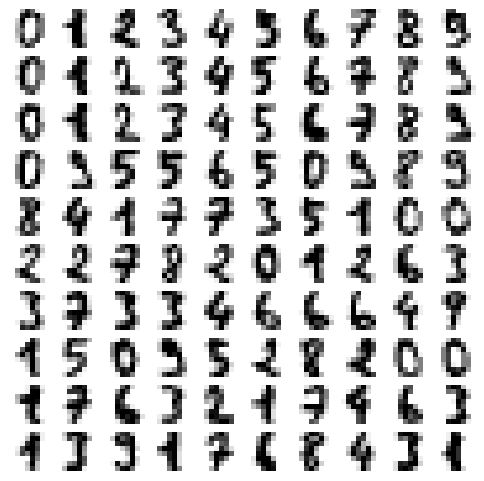

In [43]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(digits.data[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")

In [44]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

In [45]:
print(X_train.shape, X_test.shape)

(1347, 64) (450, 64)


In [52]:
pca = decomposition.PCA(n_components=20, whiten=True)
pca.fit(X_train)

PCA(n_components=20, whiten=True)

In [53]:
pca.components_.shape

(20, 64)

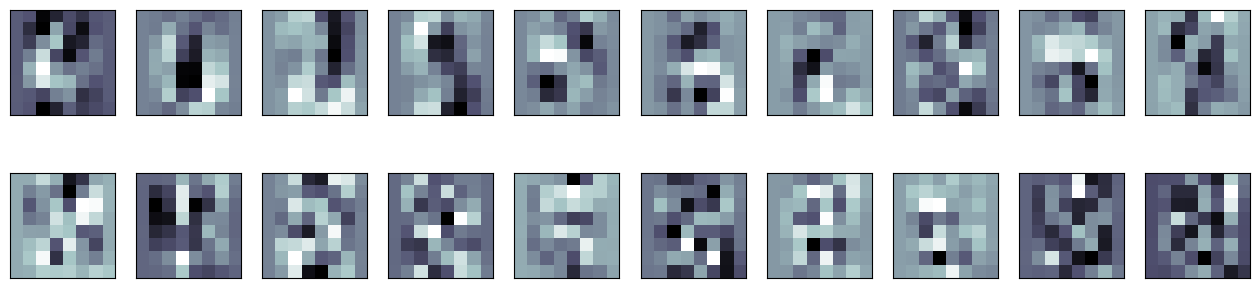

In [57]:
fig = plt.figure(figsize=(16, 6))
for i in range(20):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(digits.images[0].shape), cmap=plt.cm.bone)

Text(0, 0.5, 'Explained variance')

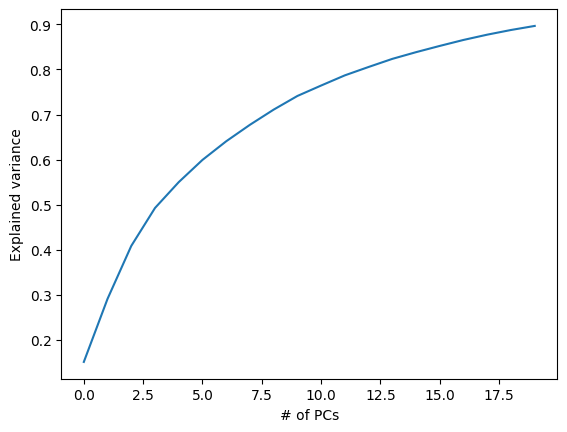

In [58]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of PCs")
plt.ylabel("Explained variance")

In [61]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(1347, 20)
(450, 20)


In [62]:
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

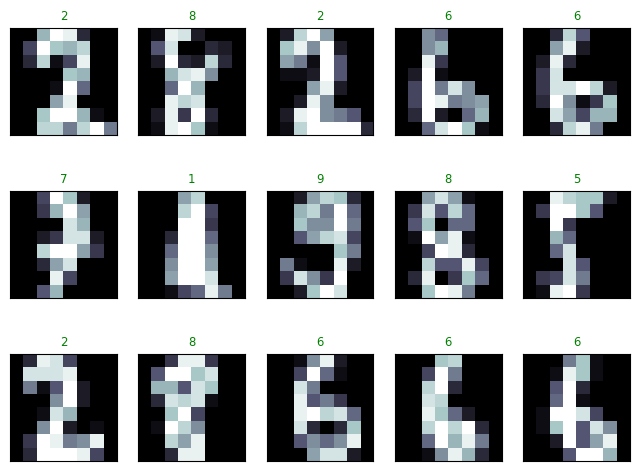

In [63]:
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(digits.images[0].shape), cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('green' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [65]:
clf_pipeline = Pipeline([
    ('pca', decomposition.PCA(n_components=20, whiten=True)),
    ('svm', svm.LinearSVC(C=1.0, max_iter=2000))
])

In [66]:
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=20, whiten=True)),
                ('svm', LinearSVC(max_iter=2000))])

In [67]:
y_pred = clf_pipeline.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
print(metrics.accuracy_score(y_pred, y_test))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  1  0  3  0]
 [ 0  0 44  1  0  0  0  0  1  0]
 [ 0  0  0 43  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  2  0  0]
 [ 0  0  0  1  0 47  0  0  2  2]
 [ 0  2  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 46  0  0]
 [ 0  1  0  0  0  0  0  0 41  0]
 [ 0  2  0  0  0  1  0  0  0 45]]
0.9533333333333334


Text(0, 0.5, 'Explained variance')

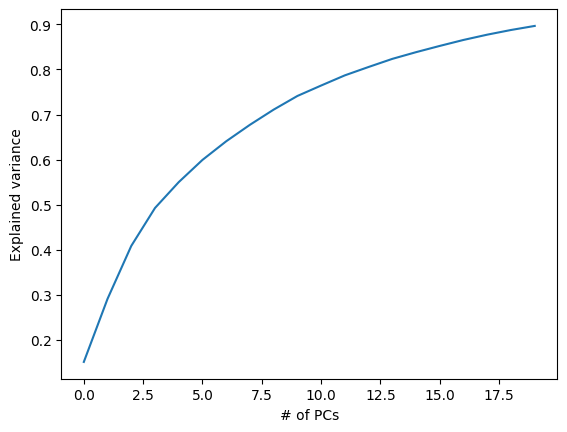

In [74]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of PCs")
plt.ylabel("Explained variance")

In [68]:
clf_pipeline = Pipeline([
    ('pca', decomposition.PCA(n_components=17, whiten=True)),
    ('svm', svm.LinearSVC(C=1.0, max_iter=2000))
])

clf_pipeline.fit(X_train, y_train)

y_pred = clf_pipeline.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
print(metrics.accuracy_score(y_pred, y_test))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  1  0  2  0]
 [ 0  0 44  1  0  0  0  0  1  0]
 [ 0  0  0 42  0  0  0  0  2  0]
 [ 0  0  0  0 37  0  0  2  0  0]
 [ 0  0  0  0  0 47  0  0  2  2]
 [ 0  2  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 46  0  0]
 [ 0  1  0  2  0  0  0  0 41  0]
 [ 0  0  0  0  0  1  0  0  0 45]]
0.9555555555555556


<Axes: xlabel='x', ylabel='y'>

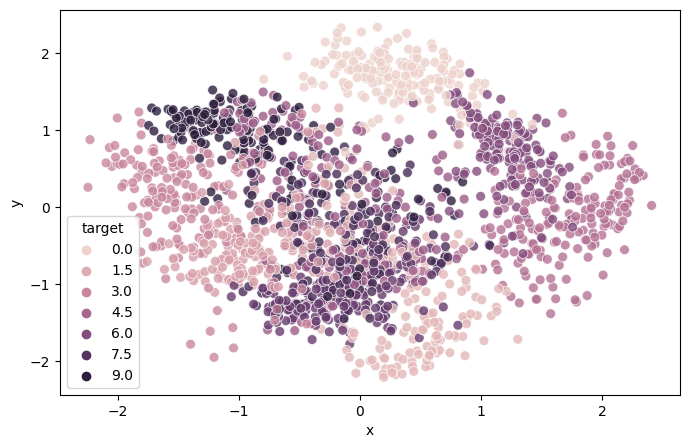

In [75]:
pca_projection = pca.transform(digits.data)

pca_df = pd.DataFrame(
    np.c_[pca_projection[:, 0: 2], digits.target], 
    columns=['x', 'y', 'target']
)

plt.figure(figsize=(8, 5))
sns.scatterplot(pca_df, x="x", y="y", hue="target", s=50, alpha=.8)

In [76]:
tsne = TSNE(
    n_components=2,
    n_iter=500,
    n_iter_without_progress=17,
    n_jobs=2,
    random_state=0,
)
tsne_projection = tsne.fit_transform(digits.data)

In [77]:
import pandas as pd
import seaborn as sns

tsne_df = pd.DataFrame(
    np.c_[tsne_projection, digits.target], 
    columns=['x', 'y', 'target']
)

<Axes: xlabel='x', ylabel='y'>

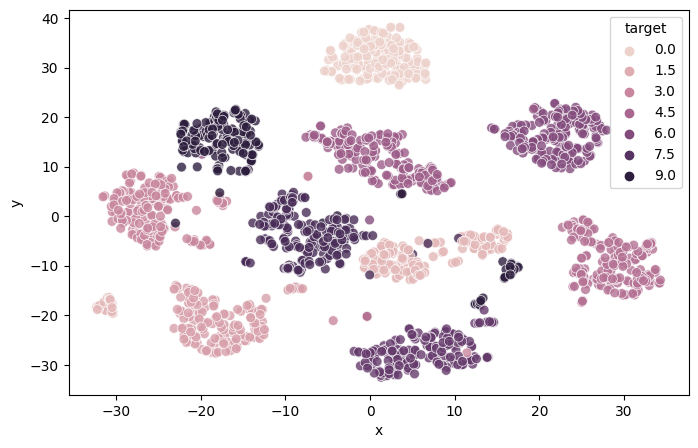

In [78]:
plt.figure(figsize=(8, 5))
sns.scatterplot(tsne_df, x="x", y="y", hue="target", s=50, alpha=.8)